In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import dill
dill.settings["recurse"] = True
from sympy import Rational as R

## Define necessary symbols

In [2]:
reference_x, reference_y = sympy.symbols("x y")

physical_x0, physical_x1, physical_x2 = sympy.symbols("x_0:3")
physical_y0, physical_y1, physical_y2 = sympy.symbols("y_0:3")
v22_x, v32_x = sympy.symbols("v22_x v32_x")
v22_y, v32_y = sympy.symbols("v22_y v32_y")
s = sympy.symbols("s")

## Get shape functions

In [3]:
monomial_basis = sympy.Matrix([
    1,
    reference_x,
    reference_y,
    reference_x**2,
    reference_x*reference_y,
    reference_y**2,
    reference_x**3,
    reference_x**2*reference_y,
    reference_x*reference_y**2,
    reference_y**3,
])

V = sympy.zeros(10, 10)

for i, basis in enumerate(monomial_basis):
    
    V[i, 0] = basis.subs({reference_x: 0, reference_y: 0})
    V[i, 1] = basis.subs({reference_x: 1, reference_y: 0})
    V[i, 2] = basis.subs({reference_x: 0, reference_y: 1})

    V[i, 3] = basis.diff(reference_x).subs({reference_x: 0, reference_y: 0})
    V[i, 4] = basis.diff(reference_y).subs({reference_x: 0, reference_y: 0})
    
    V[i, 5] = -basis.diff(reference_x).subs({reference_x: 1, reference_y: 0})
    V[i, 6] = (-basis.diff(reference_x).subs({reference_x: 1, reference_y: 0}) + +basis.diff(reference_y).subs({reference_x: 1, reference_y: 0}))
    
    V[i, 7] = -basis.diff(reference_y).subs({reference_x: 0, reference_y: 1})
    V[i, 8] = (+basis.diff(reference_x).subs({reference_x: 0, reference_y: 1}) + -basis.diff(reference_y).subs({reference_x: 0, reference_y: 1}))

    # center of mass
    V[i, 9] = basis.subs({reference_x: R(1,3), reference_y: R(1,3)})
new_basis = V.inv() @ monomial_basis

In [16]:
v11_x = physical_x1 - physical_x0
v12_x = physical_x2 - physical_x0
v21_x = physical_x0 - physical_x1
v31_x = physical_x0 - physical_x2

v11_y = physical_y1 - physical_y0
v12_y = physical_y2 - physical_y0
v21_y = physical_y0 - physical_y1
v31_y = physical_y0 - physical_y2

# v22_x = -(physical_x1 - physical_x2)
# v22_y = -(physical_y1 - physical_y2)
# v32_x = +(physical_x1 - physical_x2)
# v32_y = +(physical_y1 - physical_y2)

In [17]:
physical_x = physical_x0*new_basis[0] + physical_x1*new_basis[1] + physical_x0*new_basis[2] + \
    v11_x*new_basis[3] + v12_x*new_basis[4] + \
    v21_x*new_basis[5] + v22_x*new_basis[6] + \
    v31_x*new_basis[7] + v32_x*new_basis[8] + \
    R(1, 3)*(physical_x0 + physical_x1 + physical_x2)*new_basis[9]
    
    
physical_y = physical_y0*new_basis[0] + physical_y1*new_basis[1] + physical_y0*new_basis[2] + \
    v11_y*new_basis[3] + v12_y*new_basis[4] + \
    v21_y*new_basis[5] + v22_y*new_basis[6] + \
    v31_y*new_basis[7] + v32_y*new_basis[8] + \
    R(1, 3)*(physical_y0 + physical_y1 + physical_y2)*new_basis[9]

In [18]:
mapping_function = sympy.Matrix([physical_x, physical_y])

In [19]:
mapping_function

Matrix([
[x_0*(7*x**2*y + 7*x*y**2 - 7*x*y - 2*y**3 + 3*y**2) + x_0*(2*x**3 + 13*x**2*y - 3*x**2 + 13*x*y**2 - 13*x*y + 2*y**3 - 3*y**2 + 1) + x_1*(-2*x**3 + 7*x**2*y + 3*x**2 + 7*x*y**2 - 7*x*y) + (-x_0 + x_1)*(x**3 + 3*x**2*y - 2*x**2 + 2*x*y**2 - 3*x*y + x) + (-x_0 + x_2)*(2*x**2*y + 3*x*y**2 - 3*x*y + y**3 - 2*y**2 + y) + (x_0 - x_1)*(-x**3 + x**2 + x*y**2 - x*y) + (x_0 - x_2)*(x**2*y - x*y - y**3 + y**2) + (-x_1 + x_2)*(2*x**2*y + x*y**2 - x*y) + (x_1 - x_2)*(x**2*y + 2*x*y**2 - x*y) + (x_0/3 + x_1/3 + x_2/3)*(-27*x**2*y - 27*x*y**2 + 27*x*y)],
[y_0*(7*x**2*y + 7*x*y**2 - 7*x*y - 2*y**3 + 3*y**2) + y_0*(2*x**3 + 13*x**2*y - 3*x**2 + 13*x*y**2 - 13*x*y + 2*y**3 - 3*y**2 + 1) + y_1*(-2*x**3 + 7*x**2*y + 3*x**2 + 7*x*y**2 - 7*x*y) + (-y_0 + y_1)*(x**3 + 3*x**2*y - 2*x**2 + 2*x*y**2 - 3*x*y + x) + (-y_0 + y_2)*(2*x**2*y + 3*x*y**2 - 3*x*y + y**3 - 2*y**2 + y) + (y_0 - y_1)*(-x**3 + x**2 + x*y**2 - x*y) + (y_0 - y_2)*(x**2*y - x*y - y**3 + y**2) + (-y_1 + y_2)*(2*x**2*y + x*y**2 - x*y)

In [12]:
J = mapping_function.jacobian([reference_x, reference_y]).cofactor_matrix()
J = J / J.det()

In [15]:
mapping_function.subs({reference_x:0, reference_y: s})

Matrix([
[x_0*(-2*s**3 + 3*s**2) + x_0*(2*s**3 - 3*s**2 + 1) + (-s**3 + s**2)*(x_0 - x_2) + (-x_0 + x_2)*(s**3 - 2*s**2 + s)],
[y_0*(-2*s**3 + 3*s**2) + y_0*(2*s**3 - 3*s**2 + 1) + (-s**3 + s**2)*(y_0 - y_2) + (-y_0 + y_2)*(s**3 - 2*s**2 + s)]])

## Test the result on an example

In [40]:
points = np.array([
    [5, 3],
    [5.2, 5.1],
    [2, 2.1],
]).astype(float)

v11 = points[1] - points[0]
v12 = points[2] - points[0]
v21 = points[0] - points[1]
v31 = points[0] - points[2]

v22 = (points[2] - points[1]) + np.array([-5, 1])
v32 = (points[1] - points[2]) + np.array([0, 6])

In [41]:
X = points[0, 0]*new_basis[0] + points[1, 0]*new_basis[1] + points[2, 0]*new_basis[2] + \
    v11[0]*new_basis[3] + v12[0]*new_basis[4] + \
    v21[0]*new_basis[5] + v22[0]*new_basis[6] + \
    v31[0]*new_basis[7] + v32[0]*new_basis[8] + \
    points[:, 0].mean()*new_basis[9]

Y = points[0, 1]*new_basis[0] + points[1, 1]*new_basis[1] + points[2, 1]*new_basis[2] + \
    v11[1]*new_basis[3] + v12[1]*new_basis[4] + \
    v21[1]*new_basis[5] + v22[1]*new_basis[6] + \
    v31[1]*new_basis[7] + v32[1]*new_basis[8] + \
    points[:, 1].mean()*new_basis[9]


In [42]:
tt = np.linspace(0, 1, 100)
e1_x = sympy.lambdify([reference_x, reference_y], X)(tt, 1-tt)
e1_y = sympy.lambdify([reference_x, reference_y], Y)(tt, 1-tt)

e2_x = sympy.lambdify([reference_x, reference_y], X)(0, tt)
e2_y = sympy.lambdify([reference_x, reference_y], Y)(0, tt)

e3_x = sympy.lambdify([reference_x, reference_y], X)(tt, 0)
e3_y = sympy.lambdify([reference_x, reference_y], Y)(tt, 0)

## Visualization

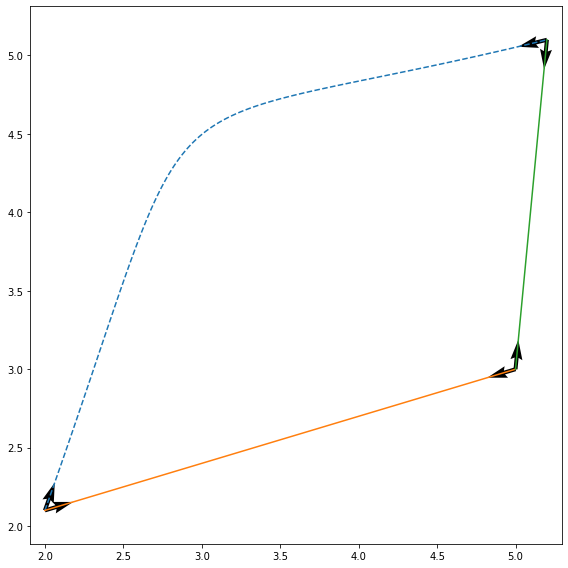

In [43]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(e1_x, e1_y, ls="--")
ax.plot(e2_x, e2_y)
ax.plot(e3_x, e3_y)

ax.quiver(points[0, 0], points[0, 1], v11[0], v11[1])
ax.quiver(points[0, 0], points[0, 1], v12[0], v12[1])

ax.quiver(points[1, 0], points[1, 1], v21[0], v21[1])
ax.quiver(points[1, 0], points[1, 1], v22[0], v22[1])

ax.quiver(points[2, 0], points[2, 1], v31[0], v31[1])
ax.quiver(points[2, 0], points[2, 1], v32[0], v32[1])

ax.axis("equal")
fig.tight_layout()